In [67]:
import os
import numpy as np
import random

file = open("E:/UNet/data/train.txt", "r")
names = file.read()
print(names)

2007_000032
2007_000039
2007_000063
2007_000068
2007_000121
2007_000170
2007_000241
2007_000243
2007_000250
2007_000256
2007_000333
2007_000363
2007_000364
2007_000392
2007_000480
2007_000504
2007_000515
2007_000528
2007_000549
2007_000584
2007_000645
2007_000648
2007_000713
2007_000720
2007_000733
2007_000738
2007_000768
2007_000793
2007_000822
2007_000836
2007_000876
2007_000904
2007_001027
2007_001073
2007_001149
2007_001185
2007_001225
2007_001340
2007_001397
2007_001416
2007_001420
2007_001439
2007_001487
2007_001595
2007_001602
2007_001609
2007_001698
2007_001704
2007_001709
2007_001724
2007_001764
2007_001825
2007_001834
2007_001857
2007_001872
2007_001901
2007_001917
2007_001960
2007_002024
2007_002055
2007_002088
2007_002099
2007_002105
2007_002107
2007_002120
2007_002142
2007_002198
2007_002212
2007_002216
2007_002227
2007_002234
2007_002273
2007_002281
2007_002293
2007_002361
2007_002368
2007_002370
2007_002403
2007_002462
2007_002488
2007_002545
2007_002611
2007_002639
2007

In [68]:
print(names[11])

In [69]:
import re
name = re.split("\n", names)

In [70]:
name = name[0:-1]
print(name)

['2007_000032', '2007_000039', '2007_000063', '2007_000068', '2007_000121', '2007_000170', '2007_000241', '2007_000243', '2007_000250', '2007_000256', '2007_000333', '2007_000363', '2007_000364', '2007_000392', '2007_000480', '2007_000504', '2007_000515', '2007_000528', '2007_000549', '2007_000584', '2007_000645', '2007_000648', '2007_000713', '2007_000720', '2007_000733', '2007_000738', '2007_000768', '2007_000793', '2007_000822', '2007_000836', '2007_000876', '2007_000904', '2007_001027', '2007_001073', '2007_001149', '2007_001185', '2007_001225', '2007_001340', '2007_001397', '2007_001416', '2007_001420', '2007_001439', '2007_001487', '2007_001595', '2007_001602', '2007_001609', '2007_001698', '2007_001704', '2007_001709', '2007_001724', '2007_001764', '2007_001825', '2007_001834', '2007_001857', '2007_001872', '2007_001901', '2007_001917', '2007_001960', '2007_002024', '2007_002055', '2007_002088', '2007_002099', '2007_002105', '2007_002107', '2007_002120', '2007_002142', '2007_002

In [71]:
print(len(name))

1464


In [72]:
image_batches = [name[x:x+16] for x in range(0, len(name)-8, 16)]
print(len(image_batches))

91


In [73]:
print(image_batches[0])
print(image_batches[1])
print(image_batches[-1])

from PIL import Image
import PIL
current_dir = os.getcwd()
import matplotlib.pyplot as plot

['2007_000032', '2007_000039', '2007_000063', '2007_000068', '2007_000121', '2007_000170', '2007_000241', '2007_000243', '2007_000250', '2007_000256', '2007_000333', '2007_000363', '2007_000364', '2007_000392', '2007_000480', '2007_000504']
['2007_000515', '2007_000528', '2007_000549', '2007_000584', '2007_000645', '2007_000648', '2007_000713', '2007_000720', '2007_000733', '2007_000738', '2007_000768', '2007_000793', '2007_000822', '2007_000836', '2007_000876', '2007_000904']
['2011_002770', '2011_002834', '2011_002851', '2011_002872', '2011_002873', '2011_002920', '2011_002932', '2011_002935', '2011_002947', '2011_002953', '2011_002956', '2011_003025', '2011_003038', '2011_003057', '2011_003066', '2011_003078']


256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
256
done


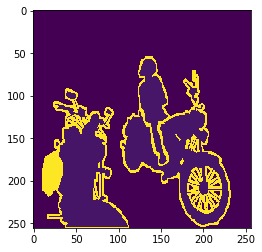

In [74]:
for bn in range(len(image_batches)):
    images = []
    for i in range(len(image_batches[bn])):
        img_temp = Image.open(f"{current_dir}\\data\\labels\\{image_batches[bn][i]}.png")
        images.append(np.array(img_temp.resize((256,256), resample=PIL.Image.NEAREST)))
        # print(images[i].shape)
        plot.imshow(images[i])

#     labels = []
#     for i in range(len(image_batches[bn])):
#         labels.append(np.zeros((132,132,22)))

    for image in images:
        for m in range(0,256):
            for n in range(0,256):
                px = image[m,n]
                if px == 255:
                    image[m,n] = 21      

#      y_train = []
#      for i in range(len(images)):
#          y_train.append(np.expand_dims(images[i], axis=0))
    print(len(images[5]))
        
    np.save(f"{current_dir}/d/train_y_sparse/y_labels{bn}", images)
print("done")

In [75]:
for bn in range(len(image_batches)):
    train_images = []

    for i in range(len(image_batches[bn])):
        img_temp = Image.open(f"{current_dir}\\data\\orig\\{image_batches[bn][i]}.jpg").convert('L') 
        train_images.append(np.array(img_temp.resize((256,256), resample=PIL.Image.NEAREST)))
        # print(train_images[i].shape)
    
#     x_train = []
#     for i in range(len(train_images)):
#         x_train.append(np.expand_dims(train_images[i], axis=2))
#         x_train[i] = np.expand_dims(x_train[i], axis=0)
    print(len(train_images))
        
    np.save(f"{current_dir}/d/train_x_sparse/x_orig{bn}", train_images)
print("done")

16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
done
